<a href="https://colab.research.google.com/github/EdinK48/ITNPAI_Assignment_Edin_Kciku_3033225/blob/main/ITNPAI1_assignment_Student3033225_TaskB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# trainX, trainY), (testX, testY) = mnist.load_data()
# Import tensorflow and load data into test and training data
import tensorflow as tf 

# Build arrays and access its mathematical functions
import numpy as np

import os  # Module for path names
import time  # Contains time related functions

# Import library for picture display and adjust the size of display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['figure.dpi']  = 100

# import library for random picture selection
import random

!pip install talos
import talos

# Split Cifar10 images into train and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 5.4 MB 8.7 MB/s 
     |████████████████████████████████| 52 kB 542 kB/s 
     |████████████████████████████████| 9.8 MB 15.3 MB/s 
     |████████████████████████████████| 462 kB 32.2 MB/s 
     |████████████████████████████████| 2.6 MB 32.6 MB/s 
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41608 sha256=ff66bd48c1877b3e427a10ac7769cc7879c1ada646cbc2399744c5e445155bb2
  Stored in directory: /root/.cache/pip/wheels/f3/2e/7e/316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
Successfully built chances
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# Show dimensions of X_train and y_train
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [ ]:
# Example output of y_train
print(y_train[0])

[6]


y_train and y_test contain the classes as numbers --> the number of entries in y_train are the number of pictures in X_train

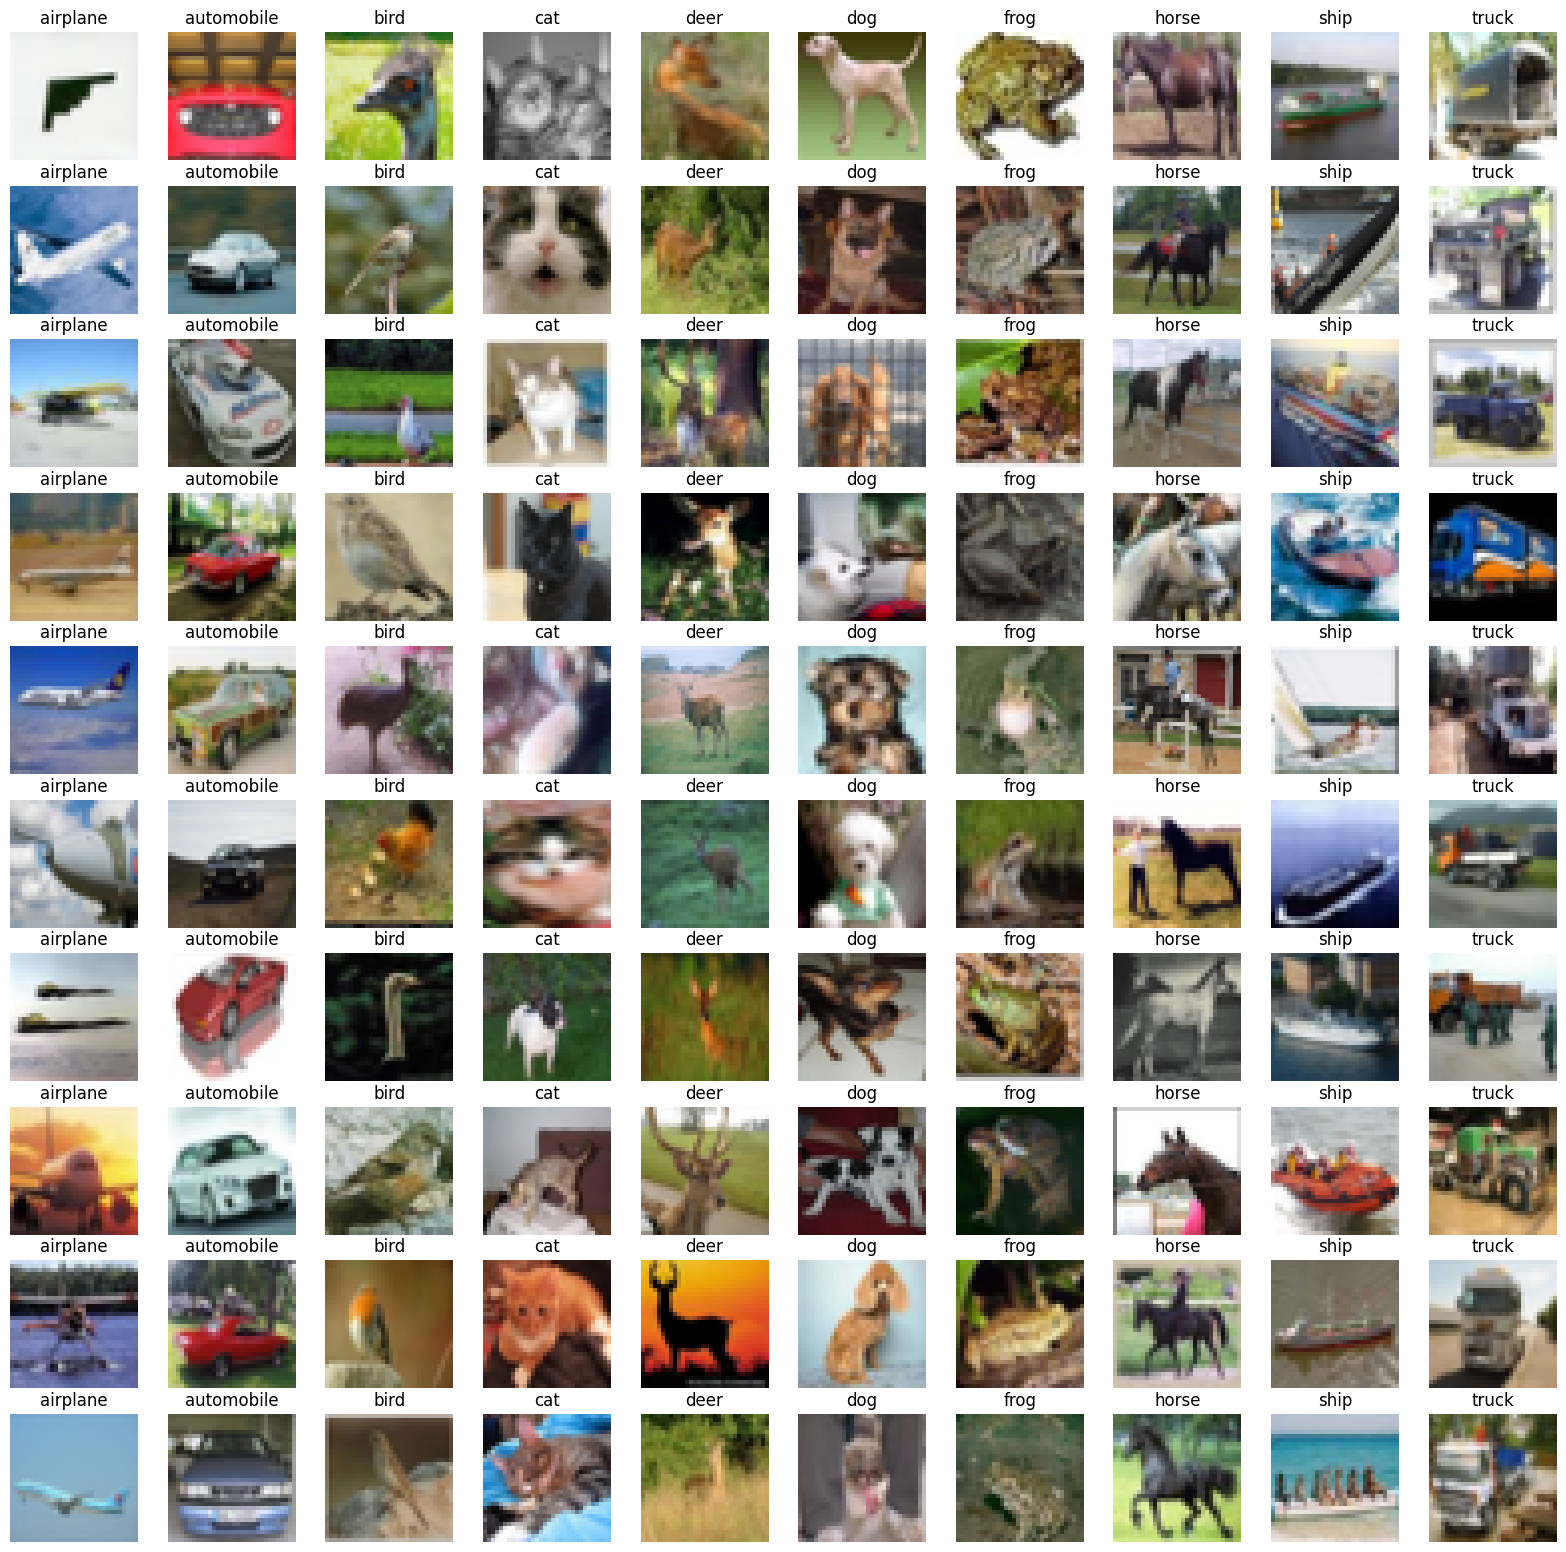

In [ ]:
# mapping of class IDs and class names
mapping_class_number = """
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
"""

# Dictionnary that contains the classes as keys.
# Each key contains a list of pictures belonging to the class.
pics_and_classes = {"airplane": [],
                    "automobile": [],
                    "bird": [],
                    "cat": [],
                    "deer": [],
                    "dog": [],
                    "frog": [],
                    "horse": [],
                    "ship": [],
                    "truck": []}

# Loop over range from 0 to number of entries in y_train
# Depending on the entry from y_train that is derived from index i, access 
# the corresponding key from mapping_class_number. Retrieve the picture from
# X_train depending on the index i, and allocate it to the list that belongs to
# the previously retrieved class
for i in range(0, y_train.shape[0]):  # from 0 to number of entries in y_train
  if y_train[i] == 0:  # class airplane
    pics_and_classes["airplane"].append(X_train[i])
  elif y_train[i] == 1:  # class automobile
    pics_and_classes["automobile"].append(X_train[i])
  elif y_train[i] == 2:  # class bird
    pics_and_classes["bird"].append(X_train[i])
  elif y_train[i] == 3:  # class cat
    pics_and_classes["cat"].append(X_train[i])
  elif y_train[i] == 4:  # class deer
    pics_and_classes["deer"].append(X_train[i])
  elif y_train[i] == 5:  # class dog
    pics_and_classes["dog"].append(X_train[i])
  elif y_train[i] == 6:  # class frog
    pics_and_classes["frog"].append(X_train[i])
  elif y_train[i] == 7:  # class horse
    pics_and_classes["horse"].append(X_train[i])
  elif y_train[i] == 8:  # class ship
    pics_and_classes["ship"].append(X_train[i])
  elif y_train[i] == 9:  # class truck
    pics_and_classes["truck"].append(X_train[i])


# Copy of pics_and_classes that can be manipulated freely while keeping
# the original pics_and_classes unchanged
pics_classes_copy = pics_and_classes.copy()

# Initilize the container for the display of the pictures
fig, ax = plt.subplots(10, 10)

images_selected = []
column = 0
# For each key / class inpics__classes_copy, choose randomly 10 pictures
for key in pics_classes_copy:
  for i in range(0, 10):  # 10 random pictures per key / class
    img = random.choice(pics_classes_copy[key])
    ax[i, column].imshow(img)
    ax[i, column].title.set_text(key)
    ax[i, column].axis("off")
  column += 1



Build AlexNet CNN

In [ ]:
def load_cifar10(num_training=49000, num_validation=1000, num_test=1000):
  global X_train, X_test, y_train, y_test
    # Fetch the CIFAR-10 dataset from the web
  X_train = np.asarray(X_train, dtype=np.float32)
  y_train = np.asarray(y_train, dtype=np.int32).flatten()
  X_test = np.asarray(X_test, dtype=np.float32)
  y_test = np.asarray(y_test, dtype=np.int32).flatten()
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]
  # Normaliza the data: subtract the mean pixel and divide by std
  mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
  std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
  X_train = (X_train - mean_pixel) / std_pixel
  X_val = (X_val - mean_pixel) / std_pixel
  X_test = (X_test - mean_pixel) / std_pixel
  # one-hot the labels
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_val = tf.keras.utils.to_categorical(y_val, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10(num_training=49000, num_validation=1000, num_test=10000)

In [ ]:
# Retrieve the last 5000 images and labesl from training dataset
X_validate, y_validate = X_train[:5000], y_train[:5000]
train_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test))
validation_tf = tf.data.Dataset.from_tensor_slices((X_validate, y_validate))
print(train_tf)
print(test_tf)
print(validation_tf)
# Get the sizes of the tensorFlow data representation
train_tf_size = tf.data.experimental.cardinality(train_tf).numpy()
test_tf_size = tf.data.experimental.cardinality(test_tf).numpy()
validation_tf_size = tf.data.experimental.cardinality(validation_tf).numpy()
print("Size Training Data:", train_tf_size)
print("Size Test Data:", test_tf_size)
print("Size Validation Data:", validation_tf_size)

<TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>
<TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>
<TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>
Size Training Data: 49000
Size Test Data: 10000
Size Validation Data: 5000


In [ ]:
def simple_model(input_shape, num_classes=10):
    # Define the input placeholder as a tensor with shape input_shape.
    X_input = tf.keras.layers.Input(input_shape)

    X = tf.keras.layers.Conv2D(filters=20, kernel_size=5, padding='same',
                      activation='relu')(X_input)
    X = tf.keras.layers.MaxPool2D()(X)
    X = tf.keras.layers.Conv2D(filters=50, kernel_size=5, padding='same',
                      activation='relu')(X)
    X = tf.keras.layers.MaxPool2D()(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(500, activation='relu')(X)
    X = tf.keras.layers.Dense(num_classes, activation='softmax')(X)

    model = tf.keras.Model(X_input, X)

    return model


model = simple_model((32, 32, 3), 10)
model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])
#history = model.fit(X_train, y_train, epochs=15, batch_size=64, verbose=2, validation_data=(X_val, y_val))
# train_tf    test_tf   validation_tf
history = model.fit(X_train, y_train, epochs=15, batch_size=64, verbose=2, validation_data=(X_val, y_val))

Epoch 1/15
766/766 - 7s - loss: 1.3205 - accuracy: 0.5297 - val_loss: 1.0591 - val_accuracy: 0.6260 - 7s/epoch - 9ms/step
Epoch 2/15
766/766 - 6s - loss: 0.9192 - accuracy: 0.6790 - val_loss: 0.8688 - val_accuracy: 0.7050 - 6s/epoch - 8ms/step
Epoch 3/15
766/766 - 6s - loss: 0.7099 - accuracy: 0.7534 - val_loss: 0.8507 - val_accuracy: 0.7110 - 6s/epoch - 8ms/step
Epoch 4/15
766/766 - 6s - loss: 0.5379 - accuracy: 0.8132 - val_loss: 0.8534 - val_accuracy: 0.7290 - 6s/epoch - 8ms/step
Epoch 5/15
766/766 - 6s - loss: 0.3866 - accuracy: 0.8662 - val_loss: 0.9701 - val_accuracy: 0.7300 - 6s/epoch - 8ms/step
Epoch 6/15
766/766 - 6s - loss: 0.2504 - accuracy: 0.9137 - val_loss: 1.0938 - val_accuracy: 0.7130 - 6s/epoch - 8ms/step
Epoch 7/15
766/766 - 6s - loss: 0.1764 - accuracy: 0.9398 - val_loss: 1.1213 - val_accuracy: 0.7250 - 6s/epoch - 8ms/step
Epoch 8/15
766/766 - 6s - loss: 0.1299 - accuracy: 0.9549 - val_loss: 1.4074 - val_accuracy: 0.7180 - 6s/epoch - 8ms/step
Epoch 9/15
766/766 - 6s 

In [ ]:
#print(X_test[0,0])
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.9107 - accuracy: 0.7159


[1.9107322692871094, 0.7159000039100647]

In [ ]:
!pip install talos
import talos

     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 9.8 MB 14.8 MB/s 
     |████████████████████████████████| 5.4 MB 29.9 MB/s 
     |████████████████████████████████| 52 kB 803 kB/s 
     |████████████████████████████████| 462 kB 49.2 MB/s 
     |████████████████████████████████| 2.6 MB 38.4 MB/s 
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41608 sha256=0fb4cddb00323c902192dc55ea3e4e64d77a5bd228caa66e12f4568f1cace36f
  Stored in directory: /root/.cache/pip/wheels/f3/2e/7e/316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
Successfully built chances
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
lenet = model
hyper_params = {'activation':['relu', 'elu', 'sigmoid', 'tanh'],
         'optimizer': ['Nadam', 'Adam', 'SGD'],
         'losses': ['categorical_crossentropy', 'sparse_categorical_crossentropy function'],
         'batch_size': [16, 32, 64, 128],
         'learning_rate': [0.001, 0.005, 0.01, 0.05],
         'epochs': [10, 15, 20, 30]}

talos.Scan(X_train[:1000], y_train[:1000], model=lenet, params=hyper_params, experiment_name="test")

NameError: ignored